# Datasets

In [3]:
import os 
from glob import glob
import pickle
import time
import numpy as np
from tqdm.notebook import tqdm
# from tqdm import tqdm


In [8]:
glob("./carla_data/*")

['./carla_data/carla-town10hd_opt-224x224-fov90-3k-2023-05-15-00-34-43',
 './carla_data/test']

In [31]:
import os 
from glob import glob
import pickle
import time
import numpy as np
# from tqdm.notebook import tqdm
# from tqdm import tqdm


def get_creation_time(file_path):
    stat = os.stat(file_path)
    creation_time = stat.st_ctime
    return creation_time

def get_latest_version():
    datasets = glob("./carla_data/*")
    latest_version = np.argmax([ get_creation_time(file_path) for file_path in datasets])
    return datasets[latest_version]


trajectories = glob(f"{get_latest_version()}/*.pkl")


dataset = []

for trajectory in trajectories:

    with open(trajectory, mode = "rb") as f:
        traj = pickle.load(f)

    obs = traj['observations']['sensor']
    actions = traj['actions']
    dataset.append(
        dict(
            obs = obs,
            actions = actions
        )
    )

with open("./LVD/data/carla/carla_dataset.pkl", mode = "wb") as f:
    pickle.dump(dataset, f)


In [48]:
trajectories = glob(f"{get_latest_version()}/*.pkl")


In [4]:
with open("./LVD/data/carla/carla_dataset.pkl", mode = "rb") as f:
    dataset = pickle.load(f)

In [1]:
from LVD.envs import *

No module named 'flow'
/home/magenta1223/anaconda3/envs/skill/lib/python3.7/site-packages/glfw/__init__.py:912: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'dotmap'
pybullet build time: May 20 2022 19:43:01


In [65]:
d = dataset[0]

# control all
# acc ~ target loc : x, y만하고
# target loc은 지우자 

preprocessed_dataset = []
for d in dataset:
    data = {}

    obs_z_removed = d['obs'][:, :3]
    for i in range(1, 7):
        obs_z_removed = np.concatenate((obs_z_removed, d['obs'][:, 3*i : 3*i + 2]), axis = -1)

    throttle_or_brake  = d['actions'][:,0] + d['actions'][:,1]
    steer = d['actions'][:, 2]

    data['obs'] = obs_z_removed
    data['actions'] = np.stack((throttle_or_brake, steer), axis = -1)


    preprocessed_dataset.append(data)




In [81]:
np.sum(obs_z_removed[:, 7:9] == d['obs'][:, 9:11])/ np.prod(obs_z_removed[:, 7:9].shape)

1.0

In [84]:
data['actions']

array([[0.85      , 0.        ],
       [0.75      , 0.        ],
       [0.65      , 0.        ],
       ...,
       [0.05920713, 0.30000001],
       [0.03330526, 0.30000001],
       [0.05992146, 0.        ]])

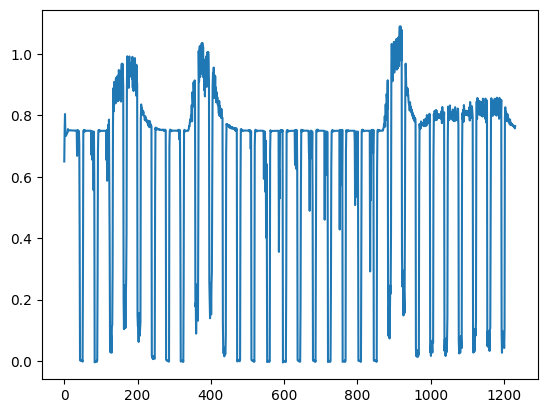

In [12]:
from matplotlib import pyplot as plt

plt.plot(dataset[0]['actions'][:,0] + dataset[0]['actions'][:,1])

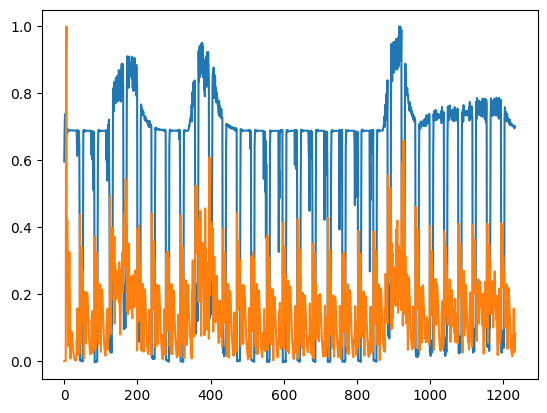

In [32]:
actions = dataset[0]['actions'][:,0] + dataset[0]['actions'][:,1]

plt.plot(actions / max(actions))

norms = np.linalg.norm(dataset[0]['obs'][:, 9:11], axis = 1)
plt.plot(norms / max(norms))

In [22]:
dataset[0]['actions'].shape

(1232, 3)

In [86]:
np.mean([81.94, 80.0, 0, 0]), np.std([81.94, 80.0, 0, 0])

(40.485, 40.49080975974672)

In [3]:
from carla_env.simulator.world import World
from carla_env.simulator.client import Client
from carla_env.simulator.route_manager import RouteManager
from carla_env.simulator.vehicles.auto_vehicle import AutoVehicle
from carla_env.simulator.vehicles.ego_vehicle import EgoVehicle
from carla_env.simulator.visualizer import Visualizer
from carla_env.utils.config import parse_config
from carla_env.utils.config import ExperimentConfigs

from carla_env.simulator.simulator import Simulator

carla_config = parse_config("./configs/data_collecting.yaml")

In [4]:
__client = Client(Simulator, carla_config.carla_ip, 2000 - carla_config.num_routes * 5)

In [14]:
dir(__client.world.map.get_spawn_points()[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_forward_vector',
 'get_inverse_matrix',
 'get_matrix',
 'get_right_vector',
 'get_up_vector',
 'location',
 'rotation',
 'transform',
 'transform_vector']

In [20]:
np.array(__client.world.map.get_spawn_points()[0].location)

array(<carla.libcarla.Location object at 0x7fd0a1d62710>, dtype=object)

In [ ]:
__client.world.map.get_spawn_points()[0].location

In [26]:
import carla


loc = carla.Location(10, 10, 0.6)

In [ ]:
loc.